Script to explore the gene expression results of Spatialscope

Agathe, started : 03/06/2025

In [1]:
## Imports
import sys
import os
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import anndata
import scanpy as sc

import matplotlib.pyplot as plt
import openslide
from PIL import Image

import mygene

from src_custom_image.utils import *

In [ ]:
## Define paths

slides = [
    "17P04394",
    "18P06762",
    # "18P08140",
    # "18P06593",
    # "18P03122",
    # "18P02831",
    # "17P02529",
]
slide = "18P06762"

In [3]:
def convert_genes_ensembles(gene_list):
    mg = mygene.MyGeneInfo()
    ensembl_dict = mg.querymany(
        gene_list, scopes="symbol", fields="ensembl.gene", species="human"
    )
    ensembl_list = []
    for gene in ensembl_dict:
        ensembl = gene.get("ensembl")
        if isinstance(ensembl, dict):
            ensembl_list.append([gene["query"], ensembl["gene"]])
        elif isinstance(ensembl, list) and len(ensembl) > 0:
            ensembl_list.append([gene["query"], ensembl[0]["gene"]])
    return ensembl_list

In [4]:
def cell_type_condition(
    cell_type: str,
    sp_adata,
    cell_type_column_name: str = "discrete_label_ct",
):
    return sp_adata.obs[cell_type_column_name] == cell_type


def PlotVisiumGene_CellType(
    cell_type: str,
    ensemble_id: str,
    sp_adata,
    cell_type_column_name: str = "discrete_label_ct",
):
    cell_cond = cell_type_condition(cell_type, sp_adata, cell_type_column_name)
    fig, ax = plt.subplots(1, 2, figsize=(40, 16), dpi=50)
    PlotVisiumGene(
        sp_adata[cell_cond],
        ensemble_id,
        ax=ax[1],
        size=4,
        alpha_img=0.2,
        palette="Greens",
    )
    PlotVisiumGene(
        sp_adata,
        ensemble_id,
        ax=ax[0],
        size=4,
        alpha_img=0.2,
        palette="Greens",
    )

In [5]:
def gene_name_id(gene_name: str, id_names: pd.DataFrame):
    """function to find correspondance from gene name to ensembl id"""
    ensemble_id = id_names["ensemble_ids"][id_names["gene_names"] == gene_name]
    if len(ensemble_id) != 0:
        return ensemble_id.iloc[0]
    else:
        return "Not in genes"

In [10]:
def plot_gene_exp(slide, gene_list, cell_type):
    results_dir = "/home/agathes/work/results"
    gene_exp_dir = os.path.join(
        results_dir,
        "spatialscope_deconv/third_run/deconv_normalised/",
        slide,
        "decomposed_gene_exp.h5ad",
    )
    gene_adata = sc.read_h5ad(gene_exp_dir)
    id_names = pd.DataFrame(
        {
            "ensemble_ids": np.array(gene_adata.var_names, dtype=str),
            "gene_names": gene_adata.var["feature_name"].to_xarray(),
        }
    )

    for gene in gene_list:
        ensemble = gene_name_id(gene, id_names)
        if ensemble == "Not in genes":
            print(ensemble)
        else:
            print(slide, gene, ensemble)
            PlotVisiumGene_CellType(cell_type, ensemble, gene_adata)
            plt.show()

17P04394 CCND1 ENSG00000110092


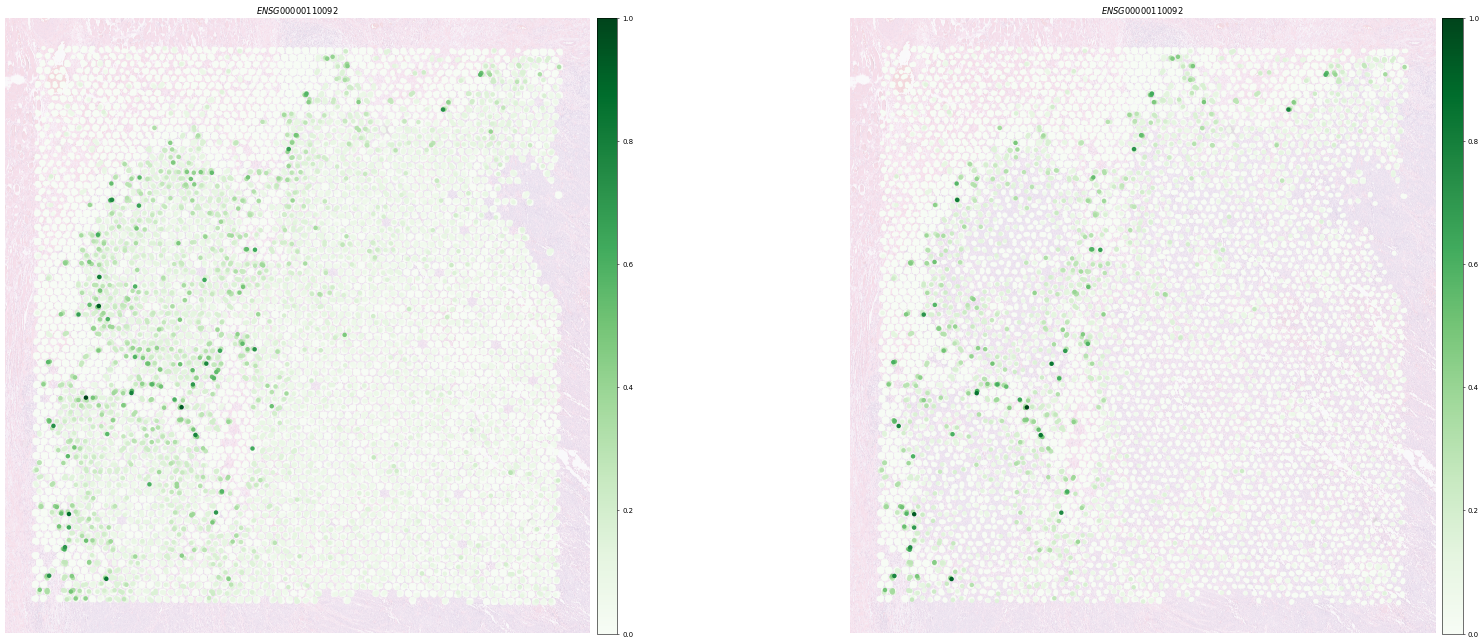

18P06762 CCND1 ENSG00000110092


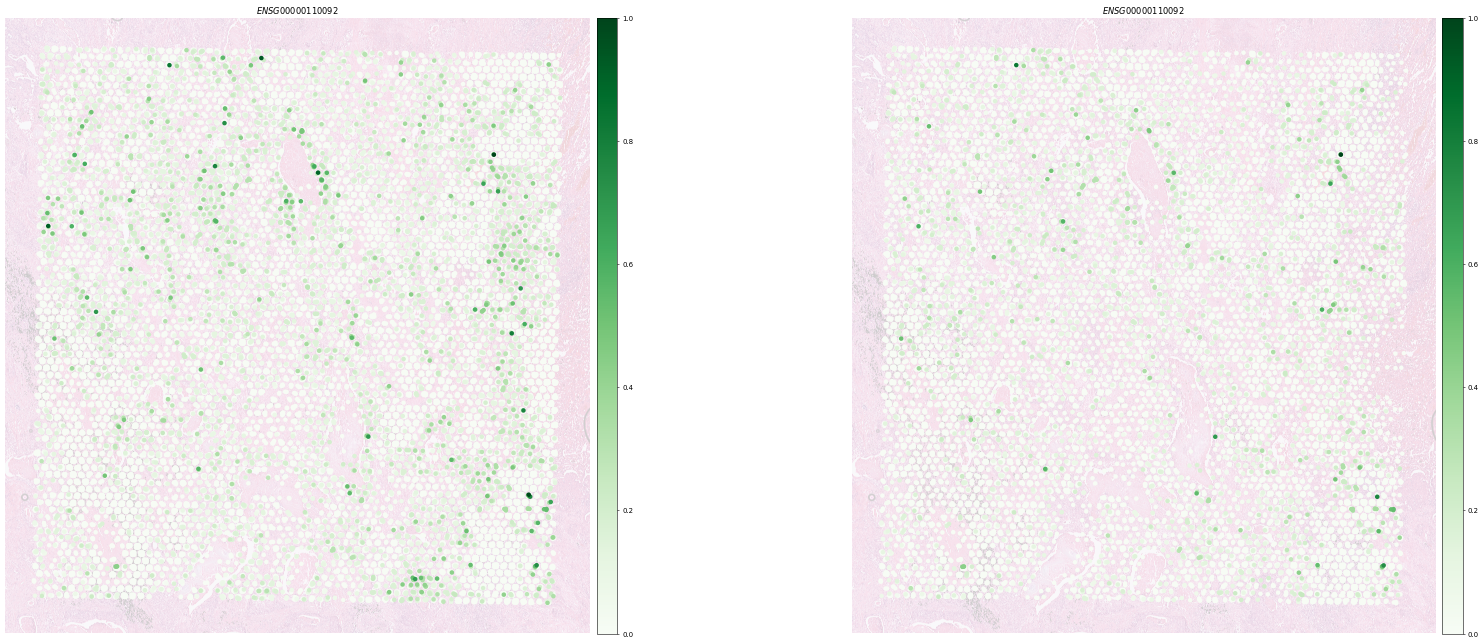

In [7]:
for slide in slides:
    # gene_list = ["ACTA2", "MYH11", "ADH1B"]
    # cell_type = "tumor-malignant cell"
    # plot_gene_exp(slide, gene_list, cell_type)
    # gene_list = ["CD3E"]
    # cell_type = "tumor-T cell"
    # plot_gene_exp(slide, gene_list, cell_type)
    gene_list = ["CCND1"]
    cell_type = "tumor-fibroblast"
    plot_gene_exp(slide, gene_list, cell_type)

In [11]:
results_dir = "/home/agathes/work/results"
gene_exp_dir = os.path.join(
    results_dir,
    "spatialscope_deconv/third_run/deconv_normalised/",
    "17P04394",
    "decomposed_gene_exp.h5ad",
)
gene_adata = sc.read_h5ad(gene_exp_dir)

In [12]:
gene_adata

AnnData object with n_obs × n_vars = 62219 × 2164
    obs: 'x', 'y', 'spot_index', 'cell_index', 'cell_nums', 'discrete_label', 'discrete_label_ct', '_'
    var: 'feature_name'
    uns: 'cell_locations', 'spatial'